In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam
from tensorflow.keras.layers import Dense, Input

## **Exercise 1: Comparing Optimizers**

In [2]:
#Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

In [3]:
#Create a neural netword model
def create_model ():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    return model

In [4]:
#function to train the model
def train_model (optimizer, X, y):
    model = create_model()
    model.compile(loss='mse', optimizer=optimizer)
    
    #train the model
    history = model.fit(X, y, epochs=50, batch_size=10, verbose=1) #verbose to show the training
    return history.history['loss']

In [5]:
#Create a list of optimizers
optimizers = {
    'SGD': SGD(), 
    'RMSprop': RMSprop(), 
    'Adam': Adam(), 
    # 'Adagrad': Adagrad(), 
    # 'Adadelta': Adadelta(), 
    # 'Adamax': Adamax(), 
    # 'Nadam': Nadam(),
}

In [6]:
# Train the model with each optimizer and record the losses during training
losses = {}
for name, optimizer in optimizers.items():
    loss_history = train_model(optimizer, X, y)
    losses[name] = loss_history

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 2.6965
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1462
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4375
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1737
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0930
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0701
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 13/50
10/10 [==============================

Text(0.5, 1.0, 'Loss vs Epochs for different optimizers')

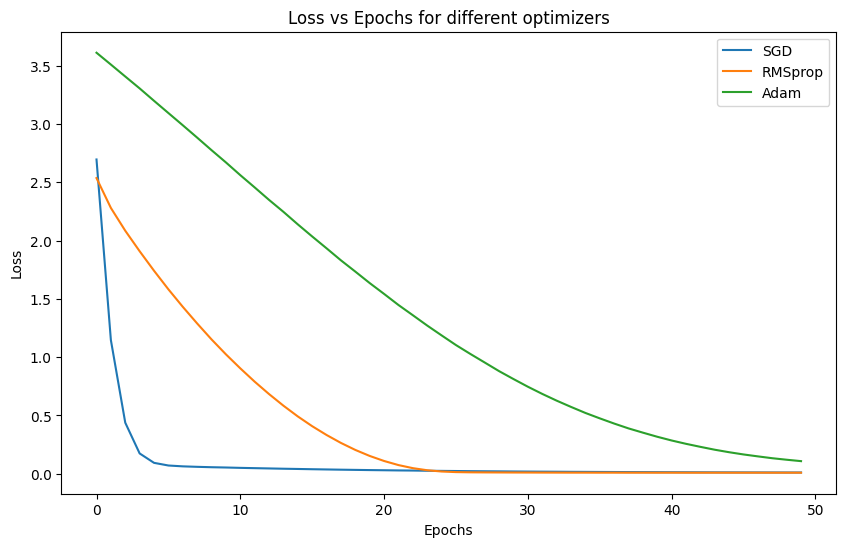

In [7]:
# Plot the loss curves for each optimizer
plt.figure(figsize=(10, 6))
for name, loss_history in losses.items():
    plt.plot(loss_history, label=name)
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for different optimizers')


## **Exercise 2: Multivariable Gradient Descent**

In [8]:
#Generate synthetic dataset
# np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

In [9]:
#Create a neural netword model
def create_model ():
    model = Sequential()
    model.add(Dense(10, input_dim = 1, activation = 'relu'))
    model.add(Dense(1))
    return model

In [10]:
def train_model (optimizer, X, y):
    model = create_model()
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(X, y,  epochs = 50, batch_size = 10, verbose = 1)
    return history.history['loss']

In [11]:
#Create a list of optimizers
optimizers = {
    'SGD': SGD, 
    'RMSprop': RMSprop, 
    'Adam': Adam,
}

In [12]:
# Train the model with each optimizer and record the losses during training
losses = {}
learning_rates = [0.001, 0.01, 0.1]
for name, optimizer in optimizers.items():
    losses[name] = {}
    for learning_rate in learning_rates:
        opt = optimizer(learning_rate=learning_rate)
        loss_history = train_model(opt, X, y)
        losses[name][learning_rate] = loss_history

Epoch 1/50
10/10 [==============================] - 0s 3ms/step - loss: 4.7835
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 4.5043
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 4.2576
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 4.0416
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 3.8458
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 3.6630
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 3.4897
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 3.3245
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 3.1667
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 3.0157
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 2.8711
Epoch 12/50
10/10 [==============================] - 0s 5ms/step - loss: 2.7326
Epoch 13/50
10/10 [==============================

Text(0.5, 1.0, 'Loss vs Epochs for different optimizers')

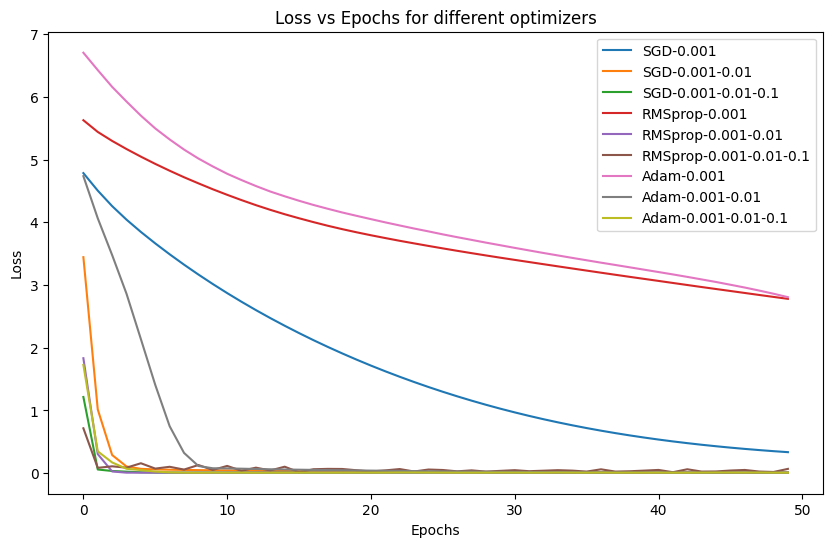

In [13]:
# Plot the loss curves for each optimizer
plt.figure(figsize=(10, 6))
for name, loss_history in losses.items():
    for learning_rate, loss_history in losses[name].items():
        name = name + '-' + str(learning_rate)
        plt.plot(loss_history, label=name)
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for different optimizers')


In [14]:
X = np.random.rand(1000, 1)
y = X + 0.1 * np.random.randn(1000, 1)

def create_model ():
    model = tf.keras.models.Sequential()
    model.add(Dense(256, input_dim = 1, activation = 'sigmoid'))
    model.add(Dense(256, input_dim = 1, activation = 'sigmoid'))
    model.add(Dense(256, input_dim = 1, activation = 'sigmoid'))
    model.add(Dense(256, input_dim = 1, activation = 'sigmoid'))
    model.add(Dense(256, input_dim = 1, activation = 'sigmoid'))
    model.add(Dense(1))
    return model

In [15]:
#Functino to track gradients during training
def get_gradients (model, inputs, targets):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(inputs)
        loss = tf.keras.losses.mean_squared_error(targets, predictions)
        
    gradients = [tape.gradient(loss, layer.weights) for layer in model.layers]
    return gradients

In [16]:
model = create_model()

model.compile(optimizer='adam', loss='mean_squared_error')

gradient_norms = {i: [] for i in range(len(model.layers))}

epochs = 100
batch_size = 32

for epoch in range (epochs):
    for i in range (0, X.shape[0], batch_size):
        x_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        
        gradients = get_gradients(model, x_batch, y_batch)
        
        for j, grad in enumerate(gradients):
            norm = np.sqrt(sum([tf.norm(g)**2 for g in grad]))
            gradient_norms[j].append(norm)
            
    model.fit(X, y, epochs=1, verbose=0)

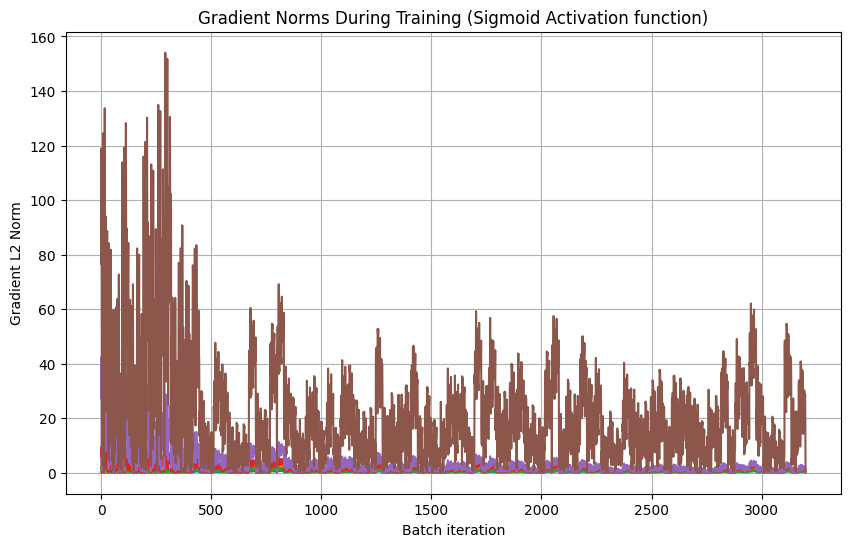

In [17]:
plt.figure(figsize=(10, 6))
for layer_index, norms in gradient_norms.items():
    plt.plot(norms, label=f'Layer {layer_index+1}')
    
plt.xlabel('Batch iteration')
plt.ylabel('Gradient L2 Norm')
plt.title('Gradient Norms During Training (Sigmoid Activation function)')
plt.grid()

## **Overfitting and Regularization**

In [18]:
np.random.seed(0)
X = np.linspace(0, 10, 100)

y = np.sin(X) + np.random.normal(0, 0.1, 100) #add noise to the sine wave

#splitting the data
X_train, X_test = X[:80], X[80:]
y_train, y_test = X[:80], X[80:]

In [19]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim = 1))
model.add(Dense(16, activation='relu', input_dim = 1))
model.add(Dense(1)) #output with no activation function (regression)

#compoile the model with mean squared error
model.compile(optimizer='adam', loss='mse')

In [20]:
#train the model (simulate overfitting)
history = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_data=(X_test, y_test))

#evaluate the model on test data
test_loss = model.evaluate(X_test, y_test, verbose=0)

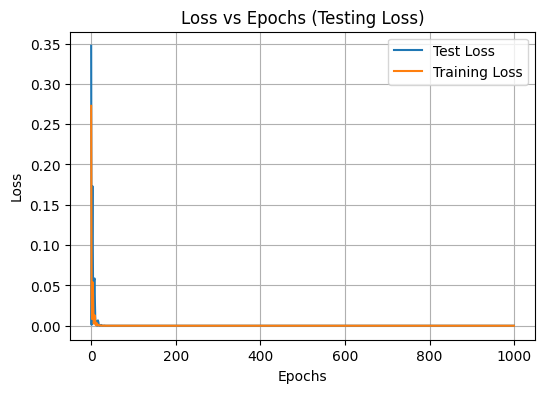

In [21]:
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

plt.figure(figsize=(6,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Testing Loss)')
plt.plot(testing_loss, label='Test Loss')
plt.plot(training_loss, label='Training Loss')
plt.legend()
plt.grid()

In [22]:
# plt.figure(figsize=(6,4))
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Loss vs Epochs (Trainig Loss)')
# plt.plot(training_loss, label='Training Loss')
# plt.legend()
# plt.grid()